**------------------------------------------------------------------------------------------------------------------------------------------------------**

**Input: Ingredients from USDA**

**Calculates Nutri-Values and Nutri-Scores**

**Output: Nutri-Values and Nutri-Scores**

**------------------------------------------------------------------------------------------------------------------------------------------------------**

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import os
import warnings
warnings.simplefilter("ignore")

**Get Ingredients from USDA and their nutritional data**

In [2]:
df = pd.read_excel('../Input Data/ABBREV.xlsx', sheet_name='ABBREV')
df.NDB_No = 'http://idea.rpi.edu/heals/kb/usda#' + df.NDB_No.astype(str).str.rjust(5,'0')

**Utils to calculte Nutri-Values and Nutri-Scores**

In [3]:
def scoreEnergy(energy):
  if energy <= 335:
    return 0
  elif energy > 3350:
    return 10
  elif energy > 3015:
    return 9
  elif energy > 2680:
    return 8
  elif energy > 2345:
    return 7
  elif energy > 2010:
    return 6
  elif energy > 1675:
    return 5
  elif energy > 1340:
    return 4
  elif energy > 1005:
    return 3
  elif energy > 670:
    return 2
  elif energy > 335:
    return 1

def scoreSugar(sugar):
  if sugar <= 4.5:
    return 0
  elif sugar > 45:
    return 10
  elif sugar > 40:
    return 9
  elif sugar > 36:
    return 8
  elif sugar > 31:
    return 7
  elif sugar > 27:
    return 6
  elif sugar > 22.5:
    return 5
  elif sugar > 18:
    return 4
  elif sugar > 13.5:
    return 3
  elif sugar > 9:
    return 2
  elif sugar > 4.5:
    return 1

def scoreSaturatedFattyAcid(saturatedFattyAcids):
  if saturatedFattyAcids <= 1:
    return 0
  elif saturatedFattyAcids > 10:
    return 10
  elif saturatedFattyAcids > 9:
    return 9
  elif saturatedFattyAcids > 8:
    return 8
  elif saturatedFattyAcids > 7:
    return 7
  elif saturatedFattyAcids > 6:
    return 6
  elif saturatedFattyAcids > 5:
    return 5
  elif saturatedFattyAcids > 4:
    return 4
  elif saturatedFattyAcids > 3:
    return 3
  elif saturatedFattyAcids > 2:
    return 2
  elif saturatedFattyAcids > 1:
    return 1

def scoreSodium(sodium):
  if sodium <= 90:
    return 0
  elif sodium > 900:
    return 10
  elif sodium > 810:
    return 9
  elif sodium > 720:
    return 8
  elif sodium > 630:
    return 7
  elif sodium > 540:
    return 6
  elif sodium > 450:
    return 5
  elif sodium > 360:
    return 4
  elif sodium > 270:
    return 3
  elif sodium > 180:
    return 2
  elif sodium > 90:
    return 1

def scoreFiber(fibers):
  if fibers <= 0.9:
    return 0
  elif fibers > 4.7:
    return -5
  elif fibers > 3.7:
    return -4
  elif fibers > 2.8:
    return -3
  elif fibers > 1.9:
    return -2
  elif fibers > 0.9:
    return -1

def scoreProtein(proteins):
  if proteins <= 1.6:
    return 0
  elif proteins > 8:
    return -5
  elif proteins > 6.4:
    return -4
  elif proteins > 4.8:
    return -3
  elif proteins > 3.2:
    return -2
  elif proteins > 1.6:
    return -1

In [4]:
def get_nutri_value(row):

    energy = float(row['Energ_Kcal'])
    sugar = float(row['Sugar_Tot_(g)'])
    fat_sat = float(row['FA_Sat_(g)'])
    sodium = float(row['Sodium_(mg)'])
    fiber = float(row['Fiber_TD_(g)'])
    protein = float(row['Protein_(g)'])
    
    total = 0

    if not np.isnan(energy):
        total += scoreEnergy(energy*4.184)
    if not np.isnan(sugar):
        total += scoreSugar(sugar)
    if not np.isnan(fat_sat):
        total += scoreSaturatedFattyAcid(fat_sat)
    if not np.isnan(sodium):
        total += scoreSodium(sodium)
    if not np.isnan(fiber):
        total += scoreFiber(fiber)
    if not np.isnan(protein):
        total += scoreProtein(protein)
        
    return total

In [5]:
def get_nutri_score(nutri_score):
  if nutri_score >= -15 and nutri_score <= -1:
    return 'a'
  elif nutri_score >= 0 and nutri_score <= 2:
    return 'b'
  elif nutri_score >= 3 and nutri_score <= 10:
    return 'c'
  elif nutri_score >= 11 and nutri_score <= 18:
    return 'd'
  elif nutri_score >= 19 and nutri_score <= 40:
    return 'e'

In [6]:
df['nutri_values'] = df.apply(get_nutri_value, axis='columns')
df['nutri_scores'] = df['nutri_values'].apply(get_nutri_score)

In [7]:
df = df[['NDB_No', 'Shrt_Desc', 'nutri_values', 'nutri_scores']]
df.head()

,NDB_No,Shrt_Desc,nutri_values,nutri_scores
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",25,e
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",25,e
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",20,e
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",19,e
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",15,d


In [8]:
df.to_csv('../Output/nutri_scores.csv')

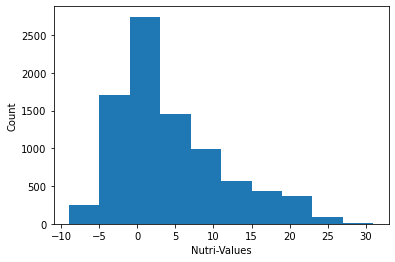

In [10]:
plt.hist(list(df['nutri_values']))
#plt.title('Distibution of the Nutri-Values')
plt.xlabel('Nutri-Values')
plt.ylabel('Count')
plt.show()